## Fastquant's stock screener

In [1]:
from fastquant.screener import Screener

In [8]:
#stock screener
ss = Screener(symbol=None, sector=None,
              start_date="2020-01-01", 
#               end_date="2020-04-31",
             )

['BH']: removed since <1/2 of original data is left after outlier rejection


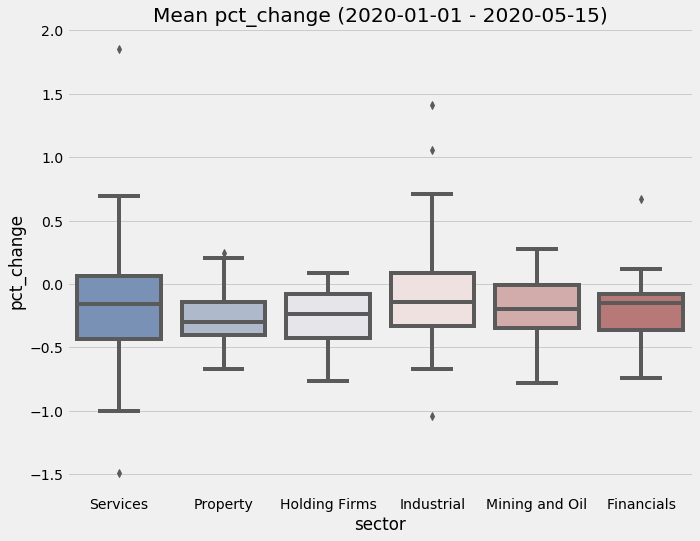

In [9]:
ss.plot_sectors_boxplot()

## ABS-CBN fiasco

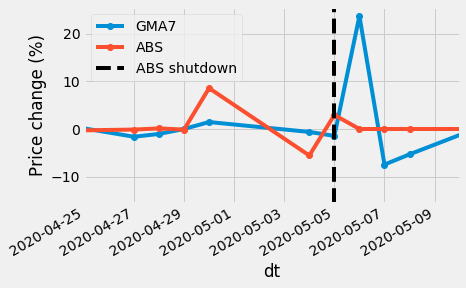

In [4]:
from datetime import datetime as dt

start_date = dt(2020,4,25)
end_date = dt(2020,5,10)

data = ss.filter_date()

ax = data['GMA7'].pct_change().apply(lambda x: x*100).plot(marker='o')
data['ABS'].pct_change().apply(lambda x: x*100).plot(ax=ax, marker='o')
ax.set_ylabel("Price change (%)")
ax.axvline(dt(2020,5,5), 0, 1, ls='--', c='k', label="ABS shutdown")
ax.set_xlim(start_date,end_date)
ax.legend()

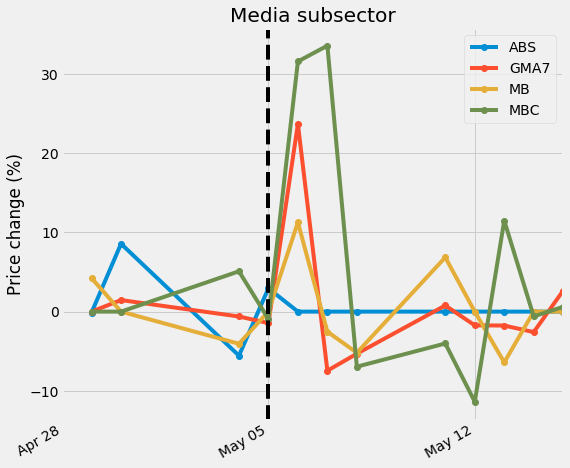

In [7]:
ax = ss.plot_subsector(subsector="Media", 
                    start_date="2020-04-28",
                    kind='line', 
                   )
ax.axvline(dt(2020,5,5), 0, 1, ls='--', c='k', label="ABS shutdown")

## oil

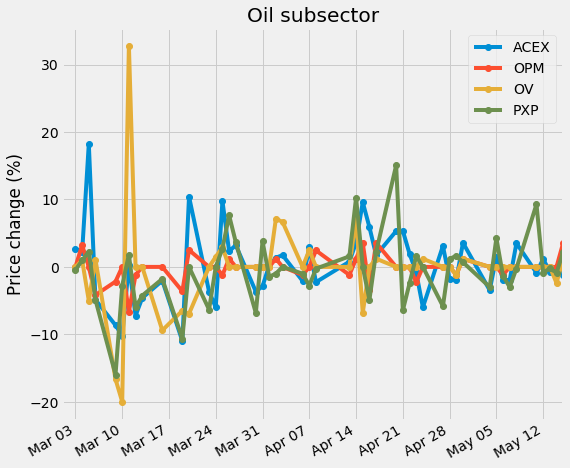

In [9]:
ax = ss.plot_subsector(subsector="Oil", 
                    start_date="2020-03-01",
                    kind='line', 
                   )

(-10, 10)

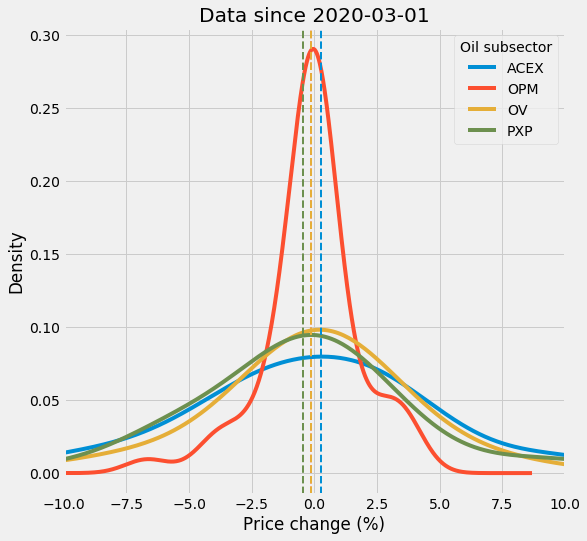

In [10]:
ax = ss.plot_subsector(subsector="Oil", 
                    start_date="2020-03-01",
                    kind='density', 
                   )
ax.set_xlim(-10,10)

(-10, 10)

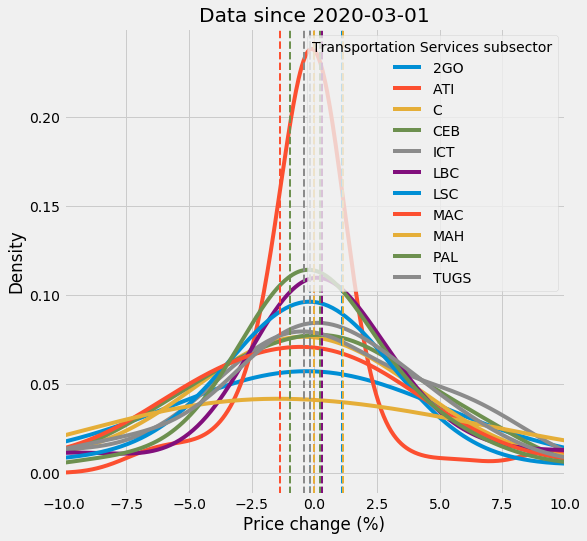

In [11]:
ax = ss.plot_subsector(subsector="Transportation Services", 
                    start_date="2020-03-01",
                    kind='density', 
                   )
ax.set_xlim(-10,10)

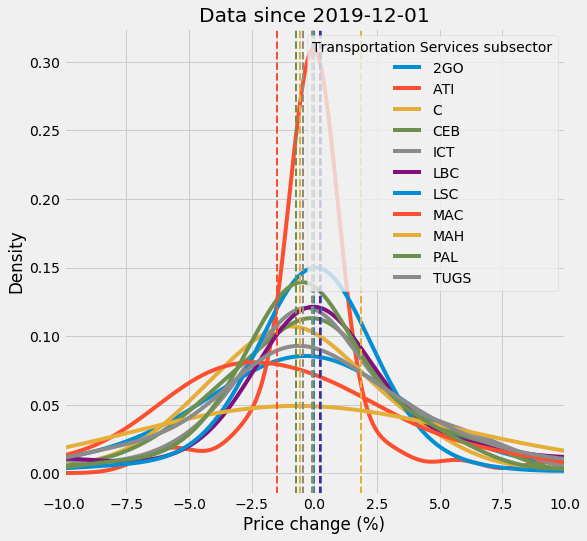

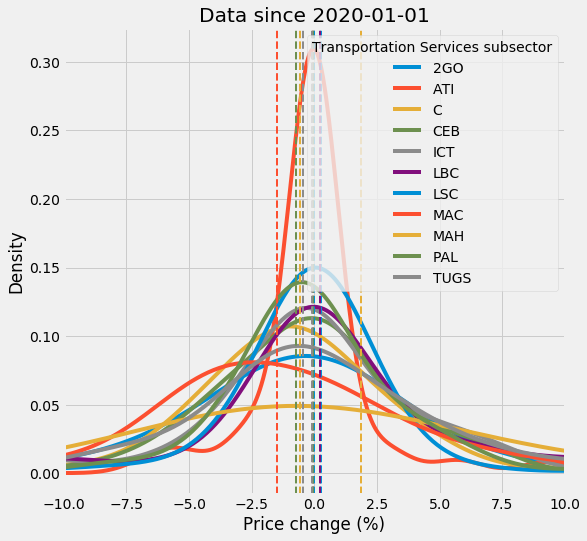

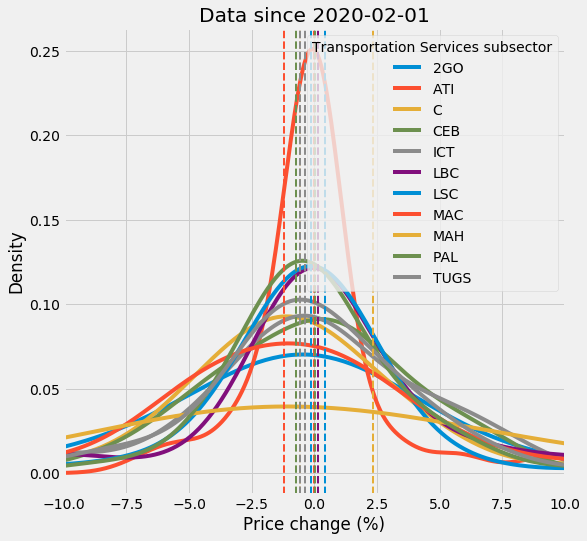

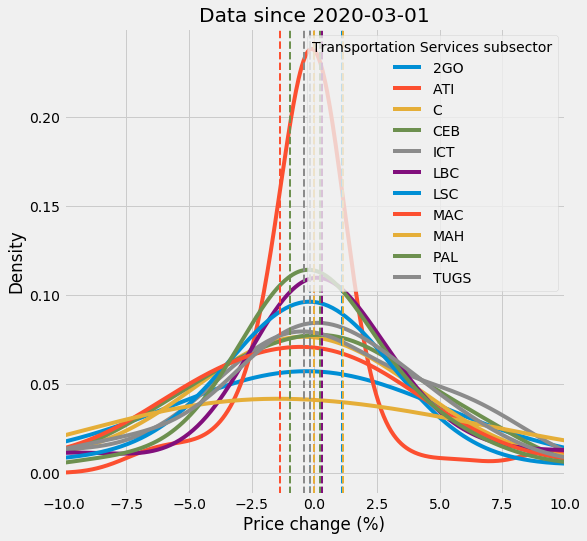

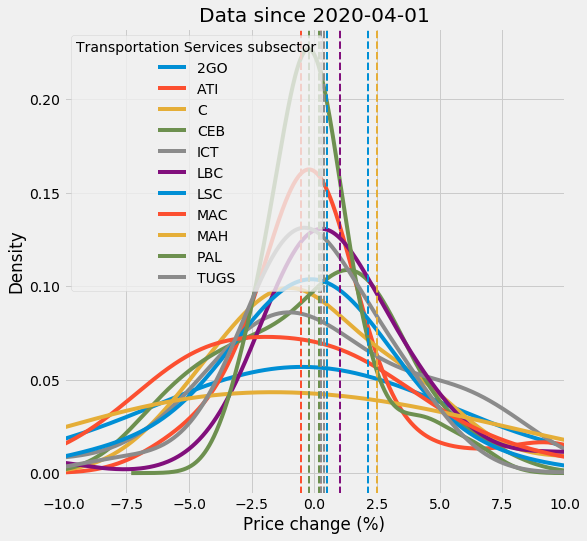

In [18]:
start_dates = ["2019-12-01",
               "2020-01-01",
               "2020-02-01",
               "2020-03-01",
               "2020-04-01",
              ]

figs = []
for start_date in start_dates:
    ax = ss.plot_subsector(subsector="Transportation Services", 
                    start_date=start_date,
                    kind='density', 
                   )
    ax.set_xlim(-10,10)

## companies robust to current events e.g. covid

In [12]:
start_date = '2020-03-01'

#entire market  
ss.get_technical_indicator_data(start_date=start_date).mean()

-0.18874831088180863

In [13]:
top = ss.get_technical_indicator_data(indicator='sharpe_ratio',start_date=start_date).head(5)
top

Symbol
2GO    0.102720
AB    -0.116127
ABA   -0.094167
ABG   -0.042795
ABS   -0.126986
Name: sharpe_ratio, dtype: float64

In [ ]:
from fastquant import DisclosuresPSE

dpse = DisclosuresPSE("TECH", start_date="03-01-2020")

In [ ]:
fig = dpse.plot_disclosures()

In [ ]:
dpse.disclosures_combined.iloc[4]["Background/Description of the Disclosure"]

In [ ]:
from fastquant import backtest, get_stock_data

data = get_stock_data("TECH", start_date="2020-01-01", end_date="2020-05-01", format="dcv")

In [ ]:
#close prices; LFM is an outlier
fd.get_technical_indicator_data(start_date=start_date,daily=True,indicator='close')[top.index.tolist()].plot()

In [ ]:
symbol='TECH'
start_date = "2020-04-01"
sector = fd.get_sector_of_symbol(symbol)
ax = fd.get_technical_indicator_data(daily=True, start_date=start_date)[symbol].plot(label=symbol)
#sector mean
fd.plot_sectors(ax=ax, sector=sector, start_date=start_date)
ax.legend()
#each symbol in sector
d=fd.get_technical_indicator_data(daily=True, start_date=start_date, sector=sector)
d.plot(ax=ax, lw=0.5, alpha=0.5,color='k', legend=False, zorder=-1)

In [ ]:
nw.all_sectors

Best bet is in industrial sector 

In [ ]:
d=fd.get_technical_indicator_data(start_date=start_date,daily=False,sector='industrial')
d[d.head().index]
# fd.get_technical_indicator_data(start_date=start_date,daily=True,indicator='close')[d.head().index.tolist()].plot()

In [ ]:
symbol='TECH'
start_date = "2020-03-01"
sector = fd.get_sector_of_symbol(symbol)

fig, ax = pl.subplots(1,2, figsize=(10,8), sharey=False)
fd.get_technical_indicator_data(daily=True, start_date=start_date)[symbol].plot(ax=ax[0],label=symbol)
#sector mean
fd.plot_sectors(ax=ax[0], sector=sector, start_date=start_date)
ax[0].legend()
#each symbol in sector
d=fd.get_technical_indicator_data(daily=True, start_date=start_date, sector=sector)
d.plot(ax=ax[0], lw=0.5, alpha=0.5,color='k', legend=False, zorder=-1)

_ = fd.plot_sectors_boxplot(ax=ax[1], sector=sector)

## screener

In [ ]:
#which one to invest today?
start_date='2020-04-01'
close_recent = close[close.index>start_date].dropna(axis=1)
pct_change = close_recent.pct_change().apply(lambda x: x*100)
top = pct_change.sum(axis=0).sort_values(ascending=False)

## network
* to make a prediction, use linear regression with covariates
* covariates 

['FFI' 'MJIC' 'TFC']: removed since <1/2 of original data is left after outlier rejection


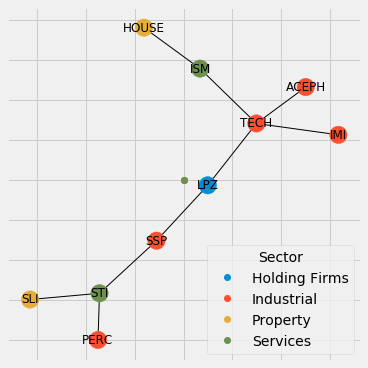

In [5]:
from fastquant.network import Network

symbol = 'TECH'
nw = Network(symbol, start_date='2020-03-01')
fig = nw.plot_network(figsize=(5,5))

In [6]:
from fastquant.network import Network

nw = Network(sector="Services", start_date='2020-03-01')
fig = nw.plot_network(show_subsector=True)

['FFI' 'MJIC' 'TFC']: removed since <1/2 of original data is left after outlier rejection
Error in callback <function flush_figures at 0x7f77c5ddc790> (for post_execute):


KeyboardInterrupt: 

## prediction

In [7]:
top

NameError: name 'top' is not defined

In [ ]:
# from fastquant.disclosures import TODAY
from fastquant import datestring_to_datetime
from datetime import datetime
from fbprophet import Prophet
import matplotlib.dates as mdates

TODAY = datetime.now().date().strftime("%Y-%m-%d")

class ProphetPrediction:
    def __init__(self, symbol, start_date, end_date=TODAY, prediction_periods=28,
                 growth_model="logistic",
                ):
        self.symbol = symbol
        self.start_date = start_date
        self.end_date = end_date
        self.prediction_periods = prediction_periods
        self.growth_model = growth_model
        self.data = self.get_stock_data()
        self.prophet_model = self.fit_data()
        self.prediction = self.predict_future()
        
    def get_stock_data(self):
        data = get_stock_data(symbol=self.symbol,
                            start_date='2010-01-01',
                            end_date=self.end_date,
                            source="phisix",
                            format="dc",
                           )
        data.columns = "ds y".split()
        data = data.dropna()
        # data.y = data.y.pct_change()

        #data used for modeling
        data2 = data[data.ds>self.start_date]
        return data2
        
    
    def fit_data(self):
        m = Prophet(growth=self.growth_model,
                    seasonality_mode='additive',
                    daily_seasonality=False,
                    weekly_seasonality=True,
                    yearly_seasonality=True,
                    interval_width=0.95, #uncertainty
                    holidays=None,
                    n_changepoints=20,
                   ) 
        m.add_country_holidays(country_name='PH')
        # m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

        if m.growth=='logistic':
            self.data['cap'] = self.data.y.max()
            self.data['floor'] = 0
        m.fit(self.data)
        return m
    
    def predict_future(self):        
        future = self.prophet_model.make_future_dataframe(periods=self.prediction_periods)
        if self.prophet_model.growth=='logistic':
            future['cap'] = self.data.y.max()
            future['floor'] = 0
            
        forecast = self.prophet_model.predict(future)
        #forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
        return forecast
    
    def plot(self):
        
        fig, ax = pl.subplots(1, 2, figsize=(15,5), constrained_layout=True)

        _ = self.prophet_model.plot(self.prediction, ax=ax[0], uncertainty=True)
        _ = self.prophet_model.plot(self.prediction, ax=ax[1], uncertainty=True)
        pl.setp(ax[0], title='Past', xlabel='Date', ylabel='Price');
        
        future_date = self.prediction.ds
        pl.setp(ax[1], title='Future', xlabel='Date', ylabel='Price',
                xlim=(datestring_to_datetime(future_date.iloc[0].strftime("%Y-%m-%d")),
                      datestring_to_datetime(future_date.iloc[-1].strftime("%Y-%m-%d")))
               );
        ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
        ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
        for label in ax[0].get_xmajorticklabels() + ax[1].get_xmajorticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment("right")
        fig.suptitle(self.symbol, y=1.1)
        return fig

In [ ]:
pp = ProphetPrediction('TECH', 
                       start_date='2019-01-01', 
                       prediction_periods=10
                      )
fig = pp.plot()

## backtest with grid_search

In [ ]:
from fastquant import backtest

symbol='TECH'

data={}
df = get_stock_data(symbol, 
                    start_date='2018-01-01', 
                    end_date='2020-04-30',
                    format='dcv',
                    #save=True
                   )
data[symbol] = df

In [ ]:
import matplotlib as mpl
mpl.style.use("default")

In [ ]:
import numpy as np

symbol = 'TECH'

fast_periods = np.arange(1,20,1)
slow_periods = np.arange(20,241,5)

# make a grid of 0's (placeholder)
period_grid = np.zeros(shape=(len(fast_periods),len(slow_periods)))
period_grid.shape

In [ ]:
init_cash=100000

for i,fast_period in enumerate(fast_periods): 
    for j,slow_period in enumerate(slow_periods):
        cerebro = backtest('smac', 
                           df, 
                           fast_period=fast_period,
                           slow_period=slow_period,
                           init_cash=100000,
                           verbose=False, 
                           plot=False
                          )
        net_profit = cerebro.broker.getvalue()-init_cash
        period_grid[i,j] = net_profit

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as pl
pl.style.use("default")

fig, ax = pl.subplots(1,1, figsize=(8,4))
xmin, xmax = slow_periods[0],slow_periods[-1]
ymin, ymax = fast_periods[0],fast_periods[-1]

#make a diverging color map such that profit<0 is red and blue otherwise
cmap = pl.get_cmap('RdBu')
norm = mcolors.DivergingNorm(vmin=period_grid.min(), 
                             vmax = period_grid.max(), 
                             vcenter=0
                            )
#plot matrix
cbar = ax.imshow(period_grid, 
                 origin='lower', 
                 interpolation='none', 
                 extent=[xmin, xmax, ymin, ymax], 
                 cmap=cmap,
                 norm=norm
                )
pl.colorbar(cbar, ax=ax, shrink=0.9,
            label='net profit', orientation="horizontal")

# search position with highest net profit
y, x = np.unravel_index(np.argmax(period_grid), period_grid.shape)
best_slow_period = slow_periods[x]
best_fast_period = fast_periods[y]
# mark position
ax.annotate(f"max profit={period_grid[y, x]:.0f}@({best_slow_period}, {best_fast_period}) days", 
            (best_slow_period+5,best_fast_period+1)
           )
ax.axvline(best_slow_period, 0, 1, c='k', ls='--')
ax.axhline(best_fast_period+0.5, 0, 1, c='k', ls='--')

# add labels
ax.set_aspect(5)
pl.setp(ax,
        xlim=(xmin,xmax),
        ylim=(ymin,ymax),
        xlabel='slow period (days)',
        ylabel='fast period (days)',
        title='{} w/ SMAC'.format(symbol),
       );

In [ ]:
best_fast_period, best_slow_period

In [ ]:
cerebro = backtest('smac', 
                   data[symbol], 
                   fast_period=best_fast_period, 
                   slow_period=best_slow_period, 
                   verbose=True, 
                   plot=True
                  )
cerebro.broker.get_value()

## MCMC

In [ ]:
import numpy as np
import emcee

def log_prob(params):
    fast_period, slow_period = params
    if fast_period>slow_period:
        return -np.inf
    if fast_period<1:
        return -np.inf
    if isinstance(fast_period, float) | \
        isinstance(slow_period, float):
        return -np.inf
        
    
    cerebro = backtest('smac', 
                       data[symbol], 
                       fast_period=fast_period, 
                       slow_period=slow_period, 
                       verbose=False, 
                       plot=False
                      )
    init_cash = cerebro.broker.params.cash
    net_profit = cerebro.broker.getvalue()-init_cash
    return net_profit

In [ ]:
ndim, nwalkers = 2, 100
p0 = np.c_[np.random.randint(low=1, high=30, size=nwalkers),
           np.random.randint(low=30, high=180, size=nwalkers)
         ]

In [ ]:
p0

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)
sampler.run_mcmc(p0, 10000)

In [ ]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

In [ ]:
sampler.chain.shape

In [ ]:
from corner import corner

fig = corner(sampler.get_chain(flat=True))